### AI policy: not allowed except when the question says "you can use AI for this". Please turn-off the automatic completion support function (AI support) in your notebook environment.

In [6]:
from sklearn.datasets import fetch_openml

# MNIST 데이터 불러오기
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

X, y = mnist["data"], mnist["target"]
y = y.astype(int)  # 문자열 → 숫자 변환

print("Data shape:", X.shape)   # (70000, 784)
print("Label shape:", y.shape)  # (70000,)

Data shape: (70000, 784)
Label shape: (70000,)


In [7]:
X,y = X[:7000], y[:7000]
print("Data shape:", X.shape)   # (70000, 784)
print("Label shape:", y.shape)  # (70000,)

Data shape: (7000, 784)
Label shape: (7000,)


In [10]:
import matplotlib.pyplot as plt
import numpy as np

def show_mnist(images, labels=None, ncols=5, figsize=(10, 10)):
    """
    Visualize one or more MNIST images (28x28).

    Parameters
    ----------
    images : np.ndarray or list
        Either a single image vector of shape (784,), or multiple images of shape (N, 784).
    labels : list or np.ndarray, optional
        Labels corresponding to the images. If provided, will be shown as titles.
    ncols : int, optional
        Number of images per row (default=5).
    figsize : tuple, optional
        Size of the whole matplotlib figure (default=(10,10)).
    """
    # Convert input to numpy array
    images = np.array(images)
    # If only one image is given (784,), reshape into (1, 784)
    if images.ndim == 1:
        images = images.reshape(1, -1)

    n = len(images)                          # number of images
    nrows = int(np.ceil(n / ncols))          # number of rows needed

    plt.figure(figsize=figsize)
    for i in range(n):
        plt.subplot(nrows, ncols, i+1)
        plt.imshow(images[i].reshape(28, 28), cmap="gray")
        plt.axis("off")
        if labels is not None:
            plt.title(str(labels[i]))
    plt.tight_layout()
    plt.show()

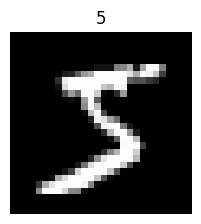

In [12]:
show_mnist(X[0], labels=[y[0]])

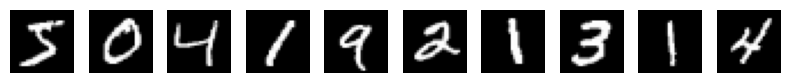

In [14]:
# Show 10 digits in a grid
show_mnist(X[:10], labels=None, ncols=10, figsize=(8,4))

In [16]:
x0 = X[0] # I define x0 as the first MNIST sample

## Q1. Nearest Neighbor Analysis

1) Find the 10 nearest neighbors of x0

2) What are their labels?

3) Plot x0 and its 10 neighbors. Do they look similar? (use above show_mnist code)

4) Find the 50 nearest neighbors of x0. Do they look similar to x0? Discuss.

5) Draw a bar plot of their label distribution.


In [28]:
from sklearn.neighbors import NearestNeighbors

x0 = X[0]
y0 = y[0]

nn10 = NearestNeighbors(n_neighbors=11, metric='euclidean')
nn10.fit(X)
distances10, indices10 = nn10.kneighbors([x0])

neighbors10 = indices10[0][1:11]
labels10 = y[neighbors10]

print("x0 label:", y0)
print("10 nearest neighbors:", labels10)

x0 label: 5
10 nearest neighbors: [5 3 5 5 5 3 5 3 5 5]


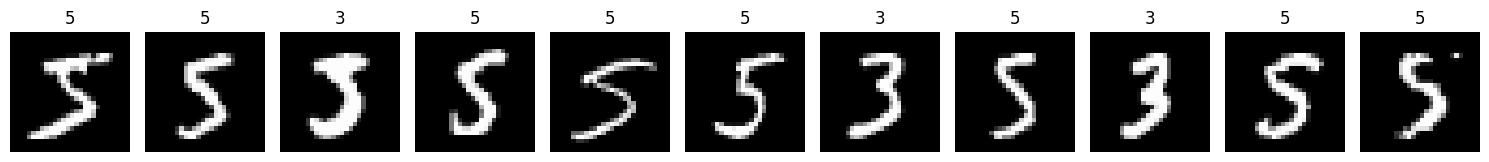

In [30]:
show_mnist([x0] + list(X[neighbors10]), 
           labels=[y0] + list(y[neighbors10]), 
           ncols=11, figsize=(15, 3))

# Yes, the 10 neighbors look similiar with x0.

50 nearest neighbors: [5 3 5 5 5 3 5 3 5 5 5 3 5 5 5 5 5 3 3 5 5 5 5 3 5 5 5 5 5 5 5 3 5 5 5 5 3
 3 3 8 5 5 3 5 5 8 3 5 5 5]


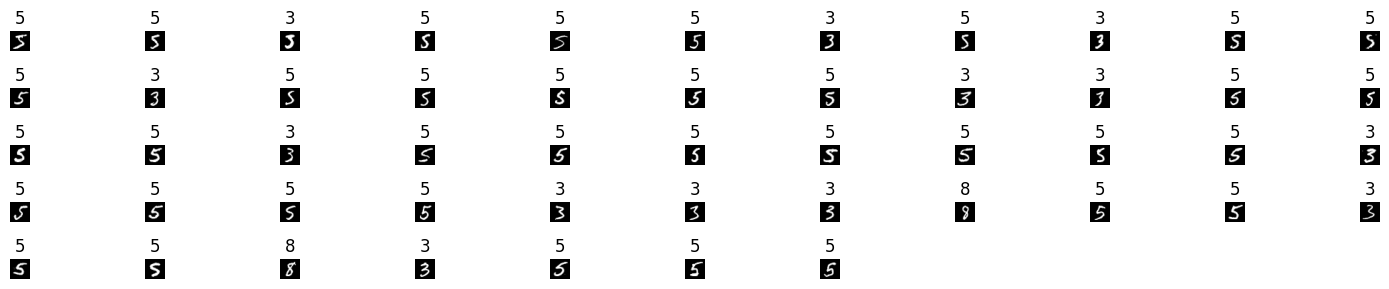

In [36]:
nn50 = NearestNeighbors(n_neighbors=51, metric="euclidean")
nn50.fit(X)

distances50, indices50 = nn50.kneighbors([x0])

neighbors50 = indices50[0][1:51]
labels50 = y[neighbors50]

print("50 nearest neighbors:", labels50)

show_mnist([x0] + list(X[neighbors50]), 
           labels=[y0] + list(y[neighbors50]), 
           ncols=11, figsize=(15, 3))

# Yes, we can see most of label are similar to x0 with number "5" and "3". 

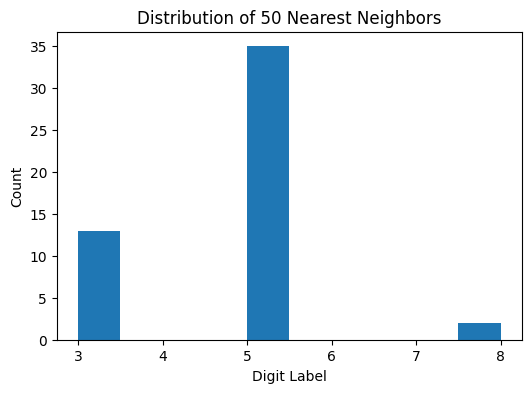

In [42]:
plt.figure(figsize=(6,4))
plt.hist(y[neighbors50])
plt.xlabel("Digit Label")
plt.ylabel("Count")
plt.title("Distribution of 50 Nearest Neighbors")
plt.show()

## Q2. KNN with Hold-out

1. Split data into 50% train and 50% test dataset for training (one hold-out split).

2. Apply K-Nearest Neighbors (KNN) classification for various values of k.

3. Plot the accuracy vs. k curve. (You may use AI tools to generate the plots.)

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)


Train shape: (3500, 784) (3500,)
Test shape: (3500, 784) (3500,)


In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = [1, 3, 5, 7, 9, 11, 15, 20]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"k={k}, Accuracy={acc:.4f}")


k=1, Accuracy=0.9314
k=3, Accuracy=0.9269
k=5, Accuracy=0.9269
k=7, Accuracy=0.9257
k=9, Accuracy=0.9249
k=11, Accuracy=0.9191
k=15, Accuracy=0.9143
k=20, Accuracy=0.9029


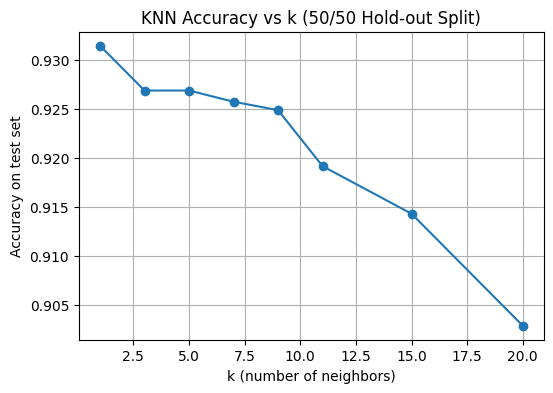

In [50]:
plt.figure(figsize=(6,4))
plt.plot(k_values, accuracies, marker="o", linestyle="-")
plt.xlabel("k (number of neighbors)")
plt.ylabel("Accuracy on test set")
plt.title("KNN Accuracy vs k (50/50 Hold-out Split)")
plt.grid(True)
plt.show()


## 3. KNN with Cross-Validation

1. Repeat the above experiment using 5-fold cross-validation instead of a single hold-out split.

2. For each k, compute the average accuracy across the 5 folds.

3. Plot the mean accuracy vs. k curve. (You may use AI tools to generate the plots.)

In [54]:
from sklearn.model_selection import cross_val_score
k_values = [1, 3, 5, 7, 9, 11, 15, 20]
cv_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring="accuracy")
    mean_acc = np.mean(scores)
    cv_accuracies.append(mean_acc)
    print(f"k={k}, Mean CV Accuracy={mean_acc:.4f}")


k=1, Mean CV Accuracy=0.9353
k=3, Mean CV Accuracy=0.9341
k=5, Mean CV Accuracy=0.9340
k=7, Mean CV Accuracy=0.9304
k=9, Mean CV Accuracy=0.9303
k=11, Mean CV Accuracy=0.9273
k=15, Mean CV Accuracy=0.9211
k=20, Mean CV Accuracy=0.9147


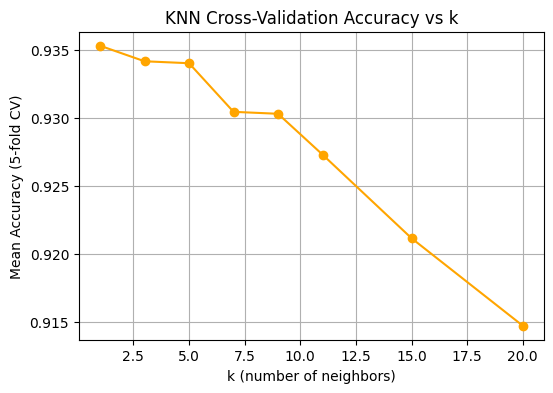

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(k_values, cv_accuracies, marker="o", linestyle="-", color="orange")
plt.xlabel("k (number of neighbors)")
plt.ylabel("Mean Accuracy (5-fold CV)")
plt.title("KNN Cross-Validation Accuracy vs k")
plt.grid(True)
plt.show()
